In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths
current_dir = os.getcwd()  # /Users/junshao/bootcamp_Jun_Shao/homework/hw8/notebooks
base_dir = os.path.abspath(os.path.join(current_dir, '..'))
data_path = os.path.join(base_dir, 'data', 'processed', 'updated_encoded_train.csv')

# Load data
df = pd.read_csv(data_path)

# Basic info
print("Dataset Info:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, SalePrice to SaleCondition_Partial
dtypes: float64(89), int64(23)
memory usage: 1.2 MB
None

Statistical Summary:
         SalePrice  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.202779    69.863699     0.043080     0.566591     5.575342   
std       0.110321    22.027677     0.046653     0.153666     1.112799   
min       0.000000    21.000000     0.000000     0.000000     1.000000   
25%       0.132030    60.000000     0.029229     0.444444     5.000000   
50%       0.177892    69.000000     0.038227     0.555556     5.000000   
75%       0.248715    79.000000     0.048150     0.666667     6.000000   
max       1.000000   313.000000     1.000000     1.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000  1460.00000

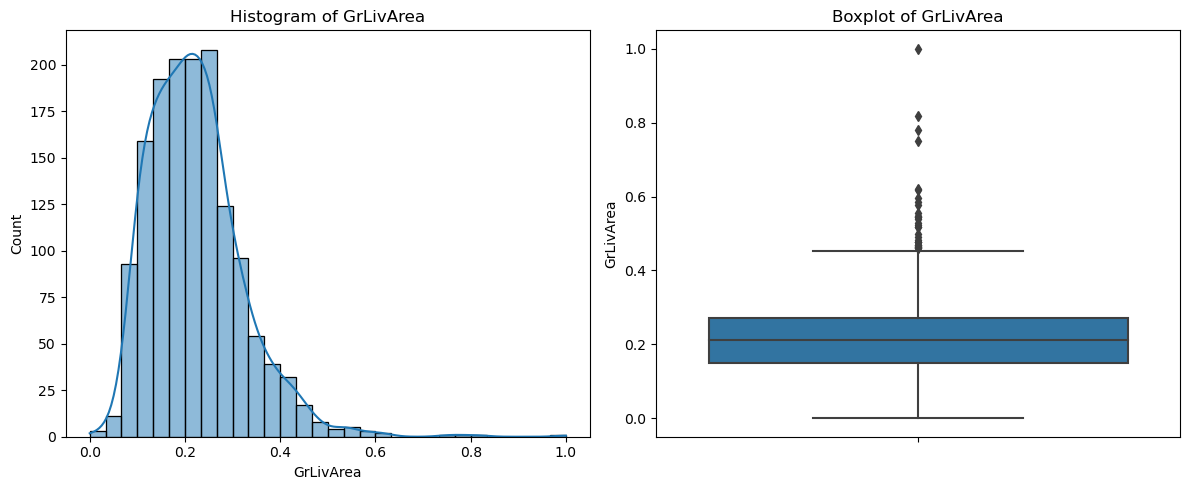

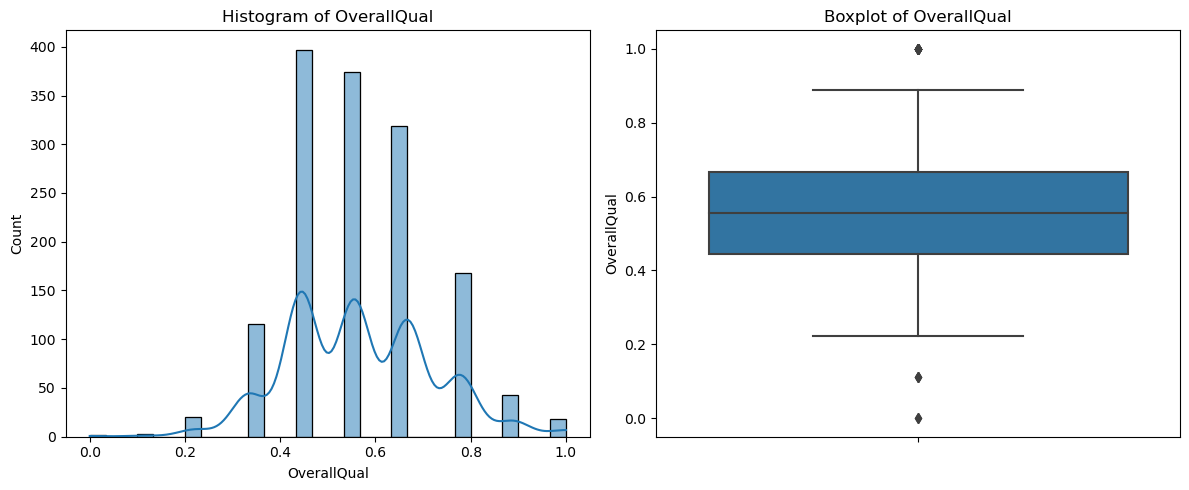

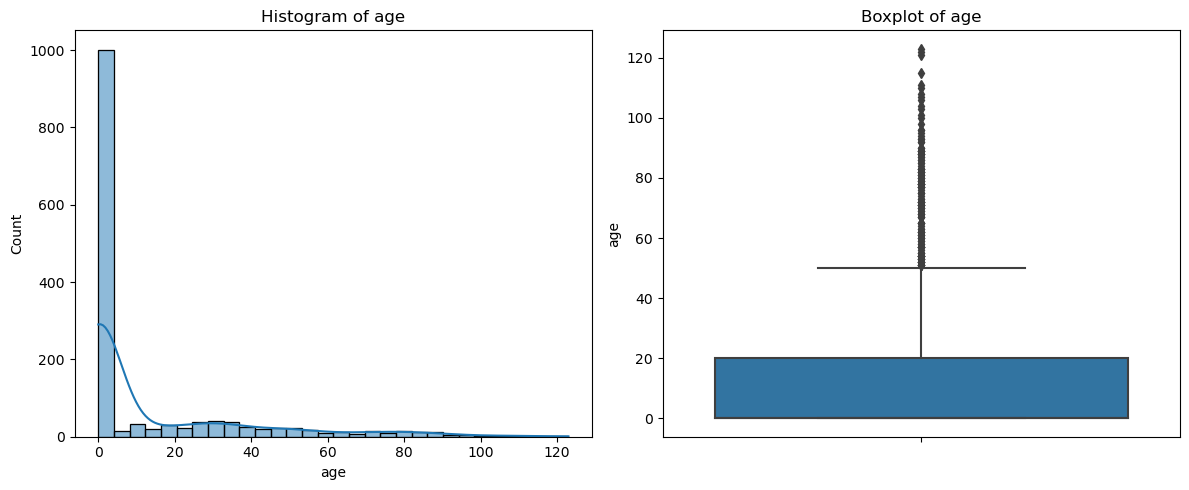

In [2]:
# Distribution plots for key variables
key_vars = ['GrLivArea', 'OverallQual', 'age']

for var in key_vars:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, 'docs', f'{var}_dist.png'))
    plt.show()

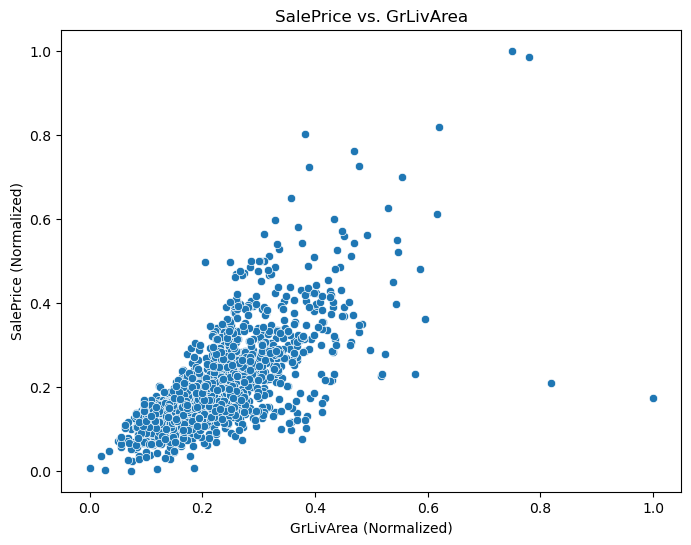

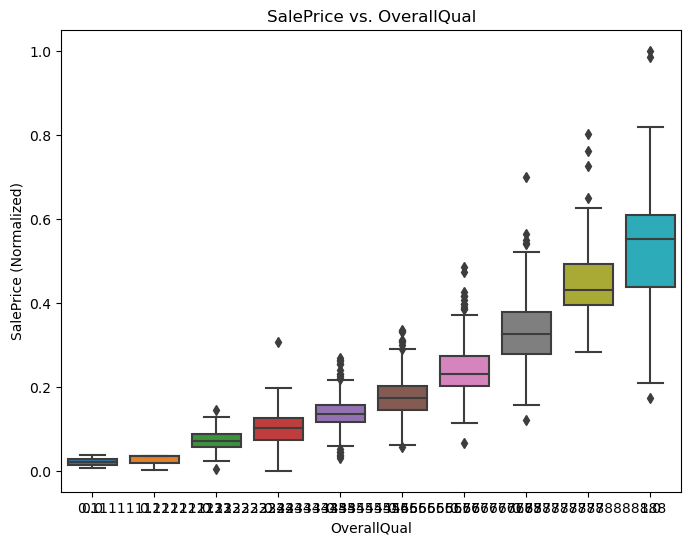

In [3]:
# Bivariate plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea (Normalized)')
plt.ylabel('SalePrice (Normalized)')
plt.savefig(os.path.join(base_dir, 'docs', 'saleprice_vs_grlivarea.png'))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs. OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice (Normalized)')
plt.savefig(os.path.join(base_dir, 'docs', 'saleprice_vs_overallqual.png'))
plt.show()

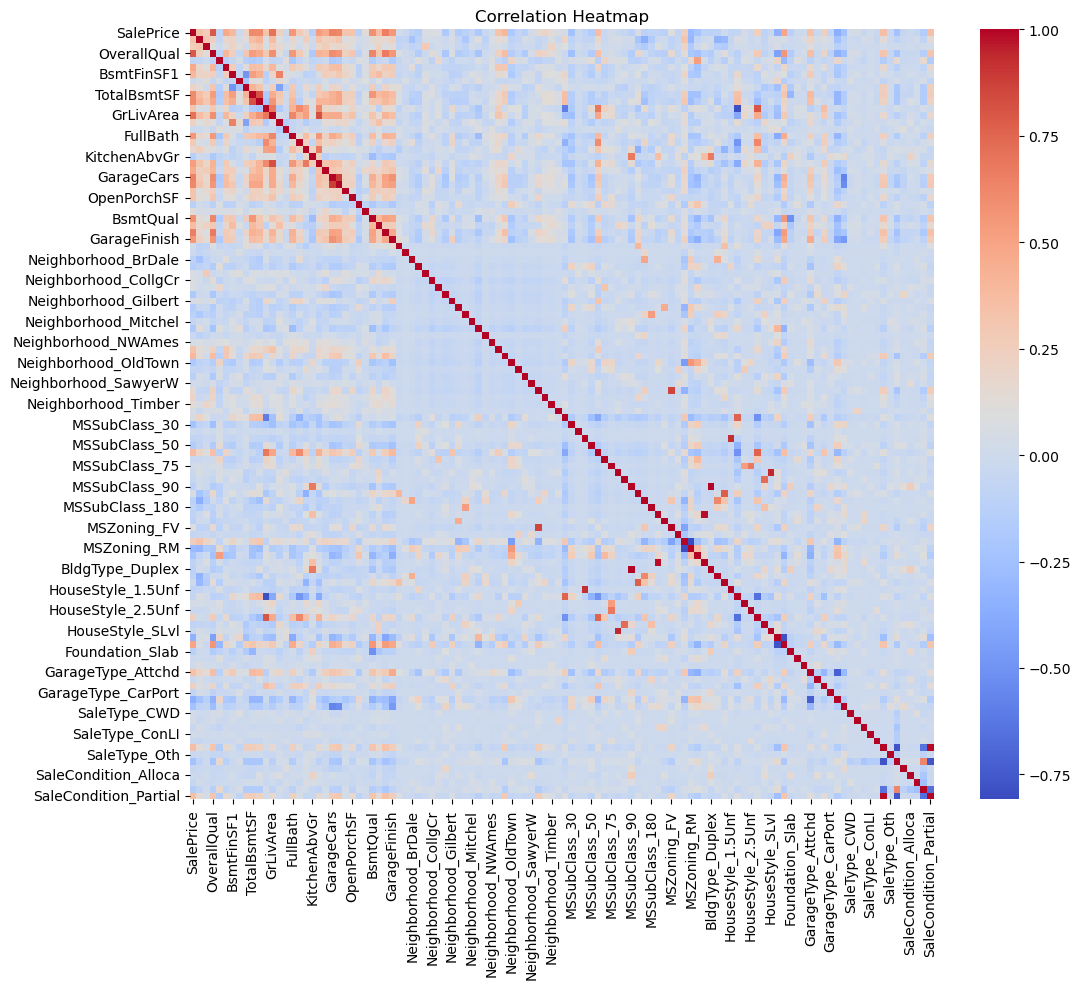

Top 10 correlations with SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
FullBath       0.560664
Name: SalePrice, dtype: float64


In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.savefig(os.path.join(base_dir, 'docs', 'correlation_heatmap.png'))
plt.show()

# Top correlations with SalePrice
print("Top 10 correlations with SalePrice:")
print(df.corr()['SalePrice'].sort_values(ascending=False).head(10))